# Day 13. Task 04
# Переобучение

## 0. Импорты

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from joblib import dump, load

## 1. Препроцессинг

1. Загрузите файл `dayofweek.csv` в датафрейм.
2. Воспользуйтесь `train_test_split` с параметрами `test_size=0.2`, `random_state=21` и получите `X_train`, `y_train`, `X_test`, `y_test`.
3. Проверьте, что распределение классов получилось примерно похожим в обучающей и тестовой выборке, воспользовавшись, например, методом `value_counts()`.
4. Воспользуйтесь дополнительным параметров `stratify=` и проверьте распределения снова. Теперь уже точно они должны быть плюс-минус одинаковыми.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
df = pd.read_csv('../content/drive/MyDrive/School21/day13/data/dayofweek.csv')
df

,numTrials,hour,dayofweek,user_0,user_1,user_10,user_11,user_12,user_13,user_14,...,lab02,lab03,lab03s,lab05s,laba04,laba04s,laba05,laba06,laba06s,project1
0,-0.788667,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.756764,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.724861,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.692958,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.661055,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1682,-0.629151,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1683,-0.597248,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1684,-0.565345,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [41]:
X = df.drop(columns='dayofweek')
y = df.dayofweek

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=21,
                                                    shuffle=True,
                                                    stratify=None)

In [43]:
y_train.value_counts(normalize=True)

3    0.232196
6    0.212908
1    0.164688
5    0.160237
2    0.092730
0    0.077893
4    0.059347
Name: dayofweek, dtype: float64

In [44]:
y_test.value_counts(normalize=True)

3    0.245562
6    0.204142
5    0.162722
1    0.153846
0    0.091716
4    0.071006
2    0.071006
Name: dayofweek, dtype: float64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=21,
                                                    shuffle=True,
                                                    stratify=y)

In [46]:
y_train.value_counts(normalize=True)

3    0.234421
6    0.211424
1    0.162463
5    0.160979
2    0.088279
0    0.080861
4    0.061573
Name: dayofweek, dtype: float64

In [47]:
y_test.value_counts(normalize=True)

3    0.236686
6    0.210059
1    0.162722
5    0.159763
2    0.088757
0    0.079882
4    0.062130
Name: dayofweek, dtype: float64

## 2. Baseline-модели

1. Обучите точно такие же baseline-модели, что и в предыдущем задании, и посчитайте accuracy на тестовой выборке со стратификацией.
2. Построенные модели продемонстрировали те же значения метрики? Какая из моделей показала самую большую разницу между тем, что получилось в прошлом задании и в этом задании? Запишите ответ в markdown-ячейку в конце этой секции.

### a. Logreg

In [51]:
lr_fit = LogisticRegression(C=1.0,
                            fit_intercept=False,
                            random_state=21,
                            max_iter=100,
                            multi_class='auto').fit(X_train, y_train)

In [52]:
lr_fit.score(X_test, y_test) 

0.6272189349112426

In [14]:
abs(0.6153846153846154 - 0.6215895610913404)

0.006204945706725029

### b. SVM

In [15]:
svc_fit = SVC(C=1.0,
                            kernel='linear',
                            degree=3,
                            gamma='scale',
                            coef0=0.0,
                            shrinking=True,
                            probability=True,
                            random_state=21).fit(X_train, y_train)
svc_fit.score(X_test, y_test)     

0.7159763313609467

In [16]:
abs(0.7159763313609467 - 0.702846975088968)

0.013129356271978754

### c. Decision tree

In [17]:
tree_fit_4 = DecisionTreeClassifier(criterion='gini',
                                    max_depth=4,
                                    random_state=21
                                    ).fit(X_train, y_train)
tree_fit_4.score(X_test, y_test)                                   

0.5295857988165681

In [18]:
abs(0.5295857988165681 - 0.5516014234875445)

0.022015624670976397

### d. Random forest

In [19]:
forest = RandomForestClassifier(n_estimators=100,
                                max_depth=25,
                                random_state=21).fit(X_train, y_train)
forest.score(X_test, y_test)      

0.9289940828402367

In [20]:
abs(0.9289940828402367 - 1)

0.07100591715976334

#@markdown **Какая из моделей показала самую большую разницу между тем, что получилось в прошлом задании и в этом задании? 
Ответ: Алгоритм случайного леса**

## 3. Кросс-валидация

Мы могли бы продолжать играться дальше с гиперпараметрами моделей, чтобы достичь более высокого accuracy на тестовом датасете, но это плохая практика. Она ведет нас снова к переобучению. Тестовый датасет нужен только для того, чтобы проверить качество уже финальной модели.

Но существуют другие способы решения этой проблемы – кросс-валидация. Она не использует тестовый датасет, а временно создает валидационную выборку из обучающего датасета. Так происходит несколько раз. 

Опять же, существуют разные способы реализации, но общий принцип в том, что именно валидационная выборка используется для оптимизации гиперпараметров, а не тестовая.

1. Используя `cross_val_score` с параметром `cv=10`, посчитайте среднее accuracy и его среднее квадратическое отклонение для каждой модели, которую вы построили ранее (логрегрессия с `solver='liblinear'`, SVC, дерево классификации, случайный лес).

### a. Logreg

In [21]:
lr_fit = LogisticRegression(C=1.0,
                            fit_intercept=False,
                            random_state=21,
                            solver='liblinear',
                            multi_class='auto',
                            max_iter=100)

In [22]:
scores = cross_val_score(lr_fit, X, y, cv=10)
'Mean accuracy: {}, standard deviation of accuracy: {}'.format(scores.mean(), scores.std())

'Mean accuracy: 0.45291983657368284, standard deviation of accuracy: 0.16960708432126997'

### b. SVM

In [23]:
svc_fit = SVC(C=1.0,
                            kernel='linear',
                            degree=3,
                            gamma='scale',
                            coef0=0.0,
                            shrinking=True,
                            probability=True,
                            random_state=21)

In [24]:
scores = cross_val_score(svc_fit, X, y, cv=10)
'Mean accuracy: {}, standard deviation of accuracy: {}'.format(scores.mean(), scores.std())

'Mean accuracy: 0.5051986475063398, standard deviation of accuracy: 0.15857963555262297'

### c. Decision tree

In [25]:
tree_fit_4 = DecisionTreeClassifier(criterion='gini',
                                    max_depth=4,
                                    random_state=21
                                    )

In [26]:
scores = cross_val_score(tree_fit_4, X, y, cv=10)
'Mean accuracy: {}, standard deviation of accuracy: {}'.format(scores.mean(), scores.std())

'Mean accuracy: 0.3883523527754297, standard deviation of accuracy: 0.11835394295385691'

### d. Random forest

In [27]:
forest = RandomForestClassifier(n_estimators=100,
                                max_depth=25,
                                random_state=21)

In [28]:
scores = cross_val_score(forest, X, y, cv=10)
'Mean accuracy: {}, standard deviation of accuracy: {}'.format(scores.mean(), scores.std())

'Mean accuracy: 0.6607847280924204, standard deviation of accuracy: 0.17462799234675505'

## 4. Оптимизация

1. Выберите лучший алгоритм и поиграйтесь еще с параметрами, по-прежнему пользуясь кросс-валидацией. Найдите наилучшую комбинацию параметров.
2. Посчитайте accuracy для этой финальной модели уже на тестовом датасете.
3. Нарисуйте график с топ-10 наиболее важными признаками модели.
4. Сохраните модель, используя `joblib`.
5. Загузите модель из файла. Сделайте прогноз для тестового датасета снова и посчитайте accuracy.

In [29]:
parameters = {'criterion': ['entropy'],
              'n_estimators': list(range(100, 160, 20)),
             'max_depth': list(range(20, 30, 5)),
             'max_features': ['log2']}

In [30]:
grid = GridSearchCV(RandomForestClassifier(random_state=21),
                    param_grid=parameters,
                    cv=10).fit(X_train, y_train)

In [31]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 'log2',
 'n_estimators': 120}

In [32]:
grid.best_estimator_.score(X_test, y_test)

0.9349112426035503

In [33]:
grid.score(X_test, y_test)

0.9349112426035503

In [34]:
best_tree = RandomForestClassifier(random_state=21).fit(X_train, y_train)
best_tree.score(X_test, y_test)

0.9378698224852071

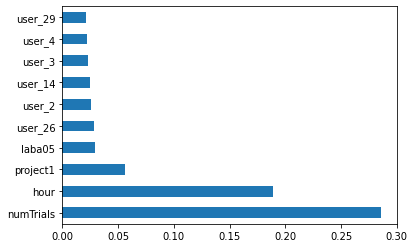

In [35]:
features = pd.Series(best_tree.feature_importances_, index=best_tree.feature_names_in_)\
    .sort_values(ascending=False)
features[0:10].plot.barh()    

In [36]:
dump(best_tree,
     '../content/drive/MyDrive/School21/day13/data/best_tree.joblib')

['../content/drive/MyDrive/School21/day13/data/best_tree.joblib']

In [37]:
best_tree = load('../content/drive/MyDrive/School21/day13/data/best_tree.joblib')
best_tree.score(X_test, y_test)

0.9378698224852071